In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from ydata_profiling import ProfileReport
#Lectura de archivo
df = pd.read_csv('prueba_base_prepagos_cd_d74e2eaf_20240213T105143 1.csv', low_memory=False)
#Cálculo de dato que se considera importante
df['Porcentaje'] = (df['monto_prepagado'] / df['monto_inicial_contrato']) * 100
#Condiciones para limitar el dataframe según consideraciones propias
condicion1 = df[df.genero_cli == 'M']
condicion2 = df[df.genero_cli == 'F']
# Aplicación de condiciones
resultado = pd.concat([condicion1, condicion2], axis=0)
resultado['tipo_prepago'] = resultado['tipo_prepago'].replace('parcial', 'PARCIAL')
resultado['tipo_prepago'] = resultado['tipo_prepago'].replace('total', 'TOTAL')
#Más condiciones
porcentaje = resultado[resultado.Porcentaje<=100]
print("Se realiza conteo general de registros de clientes por género")
print(porcentaje.genero_cli.value_counts())
print("**************************************************************")
print("Se realiza conteo general de registros de clientes por planes")
print(porcentaje.nombre_del_plan.value_counts())
print("**************************************************************")
print("Se realiza conteo general de registros de clientes por segmento de cliente")
print(porcentaje.desc_seg.value_counts())
print("**************************************************************")
print("Se realiza conteo general de registros de clientes por tipo de pago prepago")
print(porcentaje.tipo_prepago.value_counts())
print("**************************************************************")
print("Se realiza conteo general de registros de clientes por tipo de cliente")
print(porcentaje.tipo_cli.value_counts())
print("**************************************************************")
pd.options.mode.chained_assignment = None
#porcentaje.shape
porcentaje['FechaNacimiento'] = pd.to_datetime(porcentaje['f_nacim_cli'], format='%Y%m%d', errors='coerce')
# Calcular la edad
hoy = datetime.now()
porcentaje['EdadEnDias'] = (hoy - porcentaje['FechaNacimiento']).dt.days
porcentaje['EdadEnAnios'] = porcentaje['EdadEnDias'] / 365.25 
porcentaje.dropna(subset=['FechaNacimiento'])
# Definir las agrupaciones de edades
bins = [0, 18, 30, 40, 50, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51+']
porcentaje['GrupoEdad'] = pd.cut(porcentaje['EdadEnAnios'], bins=bins, labels=labels, right=False)
# Contar registros por agrupación de edades
conteo_por_edad = porcentaje['GrupoEdad'].value_counts().sort_index()
# Mostrar el conteo por agrupación de edades
print("Se realiza conteo general de registros de clientes por agrupación de edades:")
print(conteo_por_edad)

Se realiza conteo general de registros de clientes por género
genero_cli
M    1640733
F    1442612
Name: count, dtype: int64
**************************************************************
Se realiza conteo general de registros de clientes por planes
nombre_del_plan
CREDIAGIL                         945833
PERSONAL TASA FIJA S.DESEMPLEO    348055
PREAPROBADO LIBRE INVERSION       222527
LIBRE INVERSION DIG. TASA FIJA    117192
CREDITO A LA MANO AUTOMATICO      109793
                                   ...  
CONS LIBRA INT TAS CERO CIR022         1
CONS LIBRA INTRESE SUSP CIR022         1
CARTERA COMERCIAL DIGITAL IBS          1
CAMPANAS POLITICAS IBR                 1
CESANTIAS IBR                          1
Name: count, Length: 254, dtype: int64
**************************************************************
Se realiza conteo general de registros de clientes por segmento de cliente
desc_seg
PERSONAL          2649517
PYME               315836
SOCIAL              66569
PLUS               

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\cesar\AppData\Local\Temp\ipykernel_8032\469816715.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porcentaje['Rango'] = pd.cut(df['Porcentaje'], bins=bordes,
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\

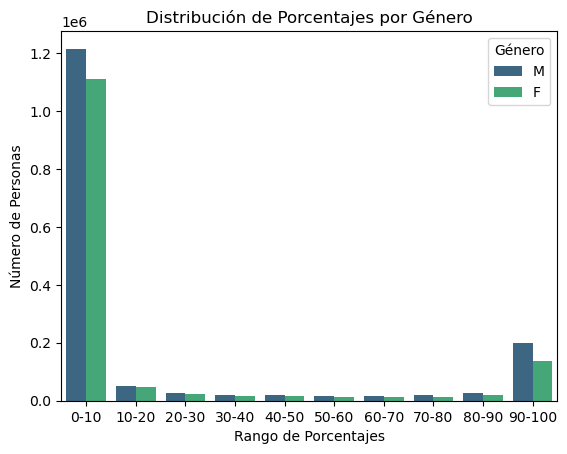

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('prueba_base_prepagos_cd_d74e2eaf_20240213T105143 1.csv', low_memory=False)
df['Porcentaje'] = (df['monto_prepagado'] / df['monto_inicial_contrato']) * 100
condicion1 = df[df.genero_cli == 'M']
condicion2 = df[df.genero_cli == 'F']
condicion3 = df[df.monto_prepagado > df.monto_inicial_contrato ]
resultado = pd.concat([condicion1, condicion2], axis=0)
porcentaje = resultado[resultado.Porcentaje<=100]
bordes = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
porcentaje['Rango'] = pd.cut(df['Porcentaje'], bins=bordes,
                     labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
df_filtrado = porcentaje[(porcentaje['genero_cli'] == 'M') | (porcentaje['genero_cli'] == 'F')]
sns.countplot(x='Rango', hue='genero_cli', data=df_filtrado, palette='viridis')
plt.title('Distribución de Porcentajes por Género')
plt.xlabel('Rango de Porcentajes')
plt.ylabel('Número de Personas')
plt.legend(title='Género')
plt.show()